In [1]:
import csv

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
from scipy.stats import pearsonr

In [4]:
long_data = list()

In [5]:
with open("../data/homology/ss/out/origin.csv", 'r') as f:
    reader = csv.reader(f)
    next(reader)

    for row in reader:
        gene, meta_exon, p, ss, hsap_score, gain_ages, loss_ages, pos_group, neg_group, tree_size, _ = row

        if ";" in gain_ages or int(tree_size) < 3:
            # `";" in gain_ages` indicates more than one gain event, which
            # we've opted to exclude.
            continue

        if gain_ages == "homo_sapiens":
            age = 0
        else:
            age = float(gain_ages)

        long_data.append({
            'p': p, 'age': age, 'score': float(hsap_score)
        })

In [6]:
frame = pd.DataFrame(long_data)

In [7]:
frame5 = frame[frame['p'] == "5"]
frame3 = frame[frame['p'] == "3"]

PearsonRResult(statistic=0.2437014028200971, pvalue=2.064824880160266e-200)


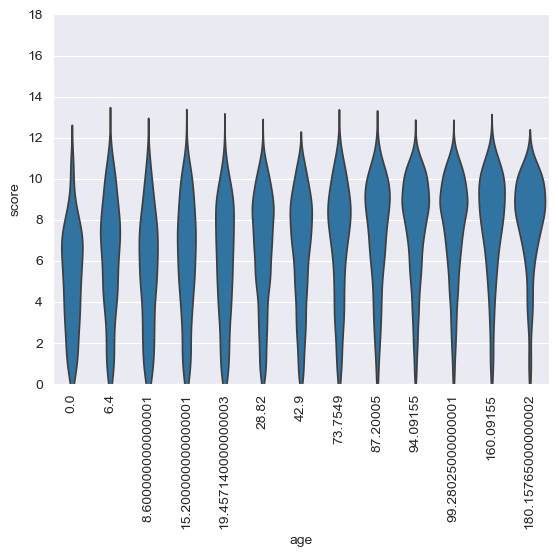

In [8]:
sns.violinplot(frame5, x='age', y='score', inner=None)
print(pearsonr(frame5['score'].values, frame5['age'].values))

_ = plt.xticks(rotation=90)
_ = plt.ylim(0, 18)

plt.savefig("figs/main1d_5.pdf")

PearsonRResult(statistic=0.22862763248811344, pvalue=2.1713892132713706e-140)


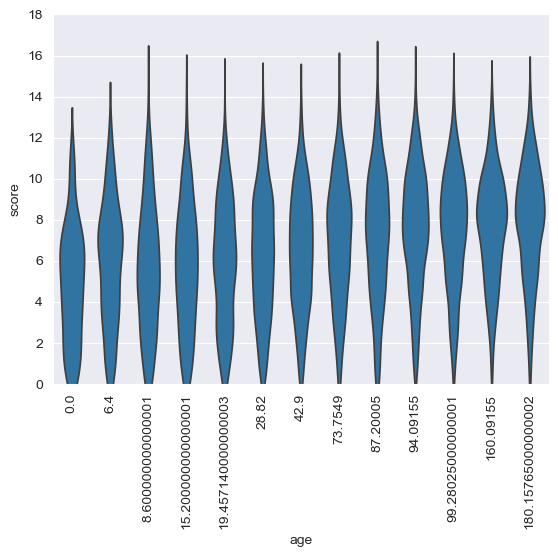

In [9]:
sns.violinplot(frame3, x='age', y='score', inner=None)
print(pearsonr(frame3['score'].values, frame3['age'].values))

_ = plt.xticks(rotation=90)
_ = plt.ylim(0, 18)

plt.savefig("figs/main1d_3.pdf")